# Imports

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy
import time
import cv2

# Part 1

In [ ]:
img = Image.open('./selfie.JPEG')
img = img.convert('L')
img = np.asarray(img)
img_comp = img[::8,::8]


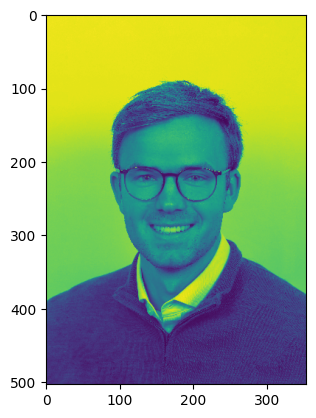

In [ ]:
plt.imshow(img_comp)

In [ ]:
d_x = [[1, 0, -1]]
d_y = [[1], [0], [-1]]
filter_9x9 = [[1, 2, 3, 4, 5, 6, 7, 8, 9],
              [1, 2, 3, 4, 5, 6, 7, 8, 9],
              [1, 2, 3, 4, 5, 6, 7, 8, 9],
              [1, 2, 3, 4, 5, 6, 7, 8, 9],
              [1, 2, 3, 4, 5, 6, 7, 8, 9],
              [1, 2, 3, 4, 5, 6, 7, 8, 9],
              [1, 2, 3, 4, 5, 6, 7, 8, 9],
              [1, 2, 3, 4, 5, 6, 7, 8, 9],
              [1, 2, 3, 4, 5, 6, 7, 8, 9],]

## Part 1.1

In [ ]:
# four for loop implementation
def four_for_loop(img, filter):
  img = img.astype(np.float32)
  result = np.array([])
  for i in range(len(img)):
    line_result = np.array([])
    for j in range(len(img[0])):
      dot_product = 0
      for k in range(len(filter)):
        for l in range(len(filter[0])):
          if i+k < 0 or i+k >= len(img) or j+l < 0 or j+l >= len(img[0]):
            continue
          dot_product += img[i+k][j+l] * filter[k][l]
      line_result = np.append(line_result, dot_product)
    result = np.append(result, line_result)

  return result.reshape(len(img), len(img[0]))



In [ ]:
# two for loops
def two_for_loop(img, filter):
  img = img.astype(np.float32)
  result = np.array([])
  for i in range(len(img)-len(filter)):
    line_result = np.array([])
    for j in range(len(img[0])-len(filter[0])):
      dot_product = np.sum(img[i:i+len(filter), j:j+len(filter[0])] * filter)
      line_result = np.append(line_result, dot_product)
    result = np.append(result, line_result)
  return result.reshape(len(img)-len(filter), len(img[0])-len(filter[0]))


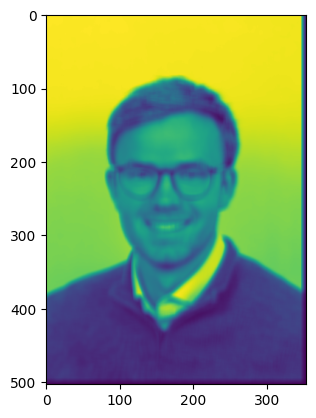

In [ ]:
plt.imshow(four_for_loop(img_comp, filter_9x9))

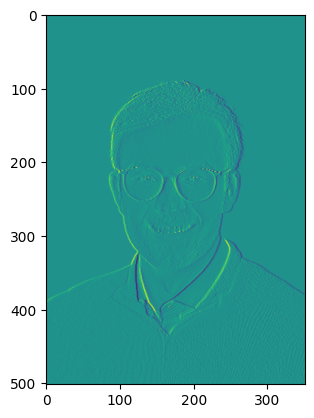

In [ ]:
plt.imshow(two_for_loop(img_comp, d_x))

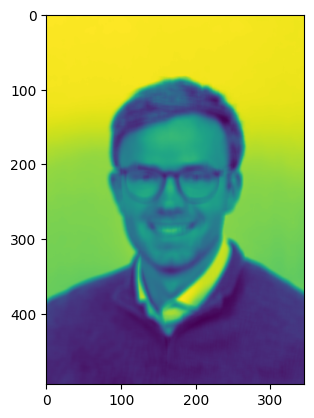

In [ ]:
plt.imshow(scipy.signal.convolve2d(img_comp, filter_9x9, mode='valid'))

In [ ]:
filters = [d_x, d_y, filter_9x9]
functions = [four_for_loop, two_for_loop, scipy.signal.convolve2d]

for filter in filters:
  for function in functions:
    print(function.__name__, filter)
    start = time.time()
    function(img_comp, filter)
    end = time.time()
    print(f"Runtime: {end - start:.4f} seconds")

four_for_loop [[1, 0, -1]]
Runtime: 1.4462 seconds
two_for_loop [[1, 0, -1]]
Runtime: 2.4307 seconds
convolve2d [[1, 0, -1]]
Runtime: 0.0044 seconds
four_for_loop [[1], [0], [-1]]
Runtime: 1.5268 seconds
two_for_loop [[1], [0], [-1]]
Runtime: 3.5698 seconds
convolve2d [[1], [0], [-1]]
Runtime: 0.0064 seconds
four_for_loop [[1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9]]
Runtime: 15.0494 seconds
two_for_loop [[1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9]]
Runtime: 3.5590 seconds
convolve2d [[1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7

In [ ]:
plt.imsave('selfie_grey_scale.png', img_comp)
plt.imsave('selfie_d_x.png', four_for_loop(img_comp, d_x))
plt.imsave('selfie_d_y.png', four_for_loop(img_comp, d_y))
plt.imsave('selfie_filter_9x9.png', four_for_loop(img_comp, filter_9x9))

## Part 1.2

In [ ]:
cameraman = img = Image.open('./cameraman.png')
cameraman = cameraman.convert('L')
cameraman = np.asarray(cameraman)

In [ ]:
Gx = scipy.signal.convolve2d(cameraman, d_x, mode='same', boundary='symm')
Gy = scipy.signal.convolve2d(cameraman, d_y, mode='same', boundary='symm')
mag = np.hypot(Gx, Gy)

mag_disp = (mag - mag.min()) / (mag.max() - mag.min() + 1e-8)

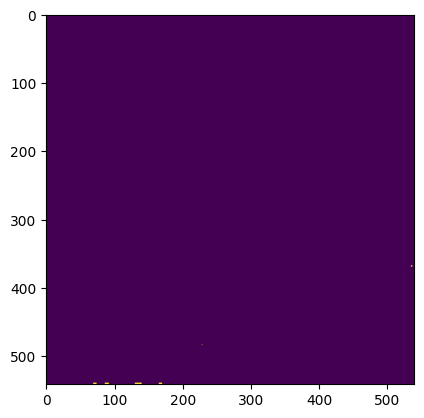

In [ ]:
for threshold in np.arange(0, 1, 0.1):
  threshold = round(threshold, 1)
  plt.imshow(mag_disp > threshold)
  plt.imsave(f'cameraman_mag_{threshold}.png', mag_disp > threshold)

## Part 1.3: Derivative of Gaussian (DoG) Filter

In [ ]:
gaussian = cv2.getGaussianKernel(ksize=10, sigma=2)
gaussian2d = np.outer(gaussian, gaussian)

In [ ]:
blurred_cameraman = scipy.signal.convolve2d(cameraman, gaussian2d, mode='same', boundary='symm')

Gx = scipy.signal.convolve2d(blurred_cameraman, d_x, mode='same', boundary='symm')
Gy = scipy.signal.convolve2d(blurred_cameraman, d_y, mode='same', boundary='symm')

mag = np.hypot(Gx, Gy)

mag_disp = (mag - mag.min()) / (mag.max() - mag.min() + 1e-8)

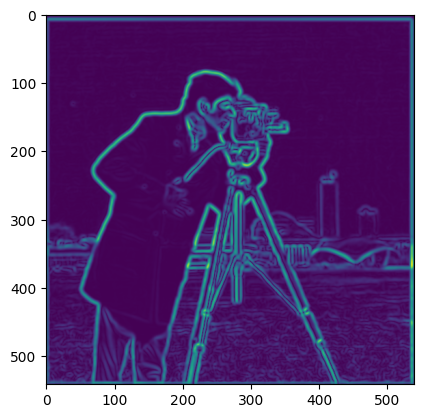

In [ ]:
plt.imshow(mag_disp)

In [ ]:
plt.imsave('cameraman_gaussian.png', mag_disp)

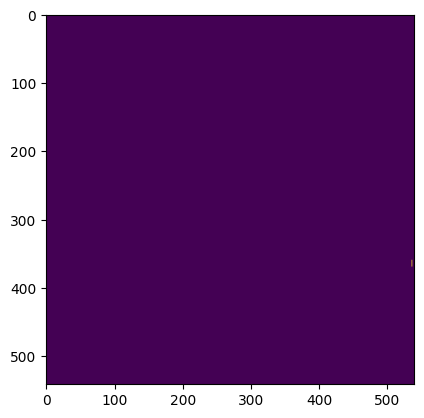

In [ ]:
for threshold in np.arange(0, 1, 0.1):
  threshold = round(threshold, 1)
  plt.imshow(mag_disp > threshold)
  plt.imsave(f'cameraman_mag_gaussian_{threshold}.png', mag_disp > threshold)

Now we can do the same thing with a single convolution instead of two by creating a derivative of gaussian filters. Convolve the gaussian with D_x and D_y and display the resulting DoG filters as images.



In [ ]:
gaussian_d_x = scipy.signal.convolve2d(gaussian2d, d_x, mode='same', boundary='symm')
gaussian_d_y = scipy.signal.convolve2d(gaussian2d, d_y, mode='same', boundary='symm')

edges_x = scipy.signal.convolve2d(cameraman, gaussian_d_x, mode='same', boundary='symm')
edges_y = scipy.signal.convolve2d(cameraman, gaussian_d_y, mode='same', boundary='symm')

mag1 = np.hypot(edges_x, edges_y)

mag_disp1 = (mag1 - mag1.min()) / (mag1.max() - mag1.min() + 1e-8)

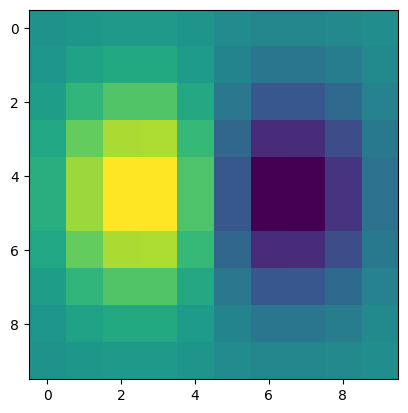

In [ ]:
plt.imshow(gaussian_d_x)

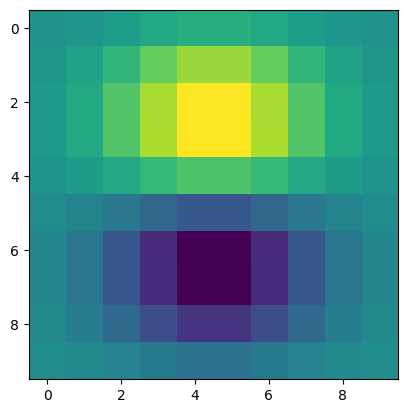

In [ ]:
plt.imshow(gaussian_d_y)

In [ ]:
plt.imsave('cameraman_gaussian_d_x.png', gaussian_d_x)
plt.imsave('cameraman_gaussian_d_y.png', gaussian_d_y)

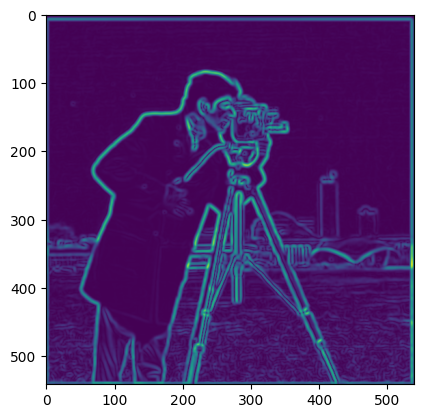

In [ ]:
plt.imshow(mag_disp1)
plt.imsave('cameraman_gaussian_onestep.png', mag_disp1)

In [ ]:
sum(sum(abs(edges_x-Gx)))

np.float64(175105.37775866152)

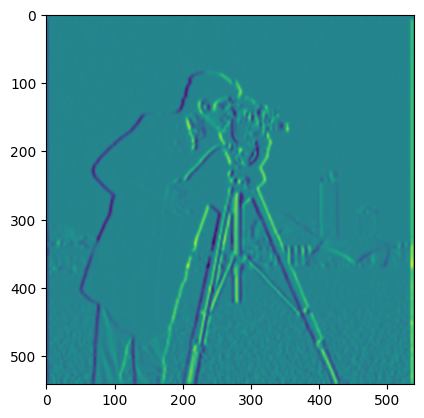

In [ ]:
plt.imshow(edges_x)

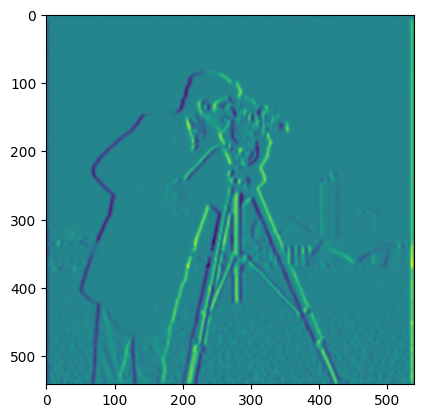

In [ ]:
plt.imshow(Gx)

# Part 2

## Part 2.1

In [ ]:
gaussian = cv2.getGaussianKernel(ksize=5, sigma=1)
gaussian2d = np.outer(gaussian, gaussian)

In [ ]:
files = ['taj', 'stadium', 'new_york']

for f in files:
  unsharp_img = Image.open('./' + f + '.jpg')
  unsharp_img = np.asarray(unsharp_img)
  unsharp_img = (unsharp_img - unsharp_img.min()) / (unsharp_img.max() - unsharp_img.min() + 1e-8)

  blurred = np.zeros_like(unsharp_img, dtype=np.float32)
  for c in range(unsharp_img.shape[2]):
      blurred[..., c] = scipy.signal.convolve2d(unsharp_img[..., c], gaussian2d, mode='same', boundary='symm')


  blurred = (blurred - blurred.min()) / (blurred.max() - blurred.min() + 1e-8)
  high_frequencies = unsharp_img - blurred
  high_frequencies = (high_frequencies - high_frequencies.min()) / (high_frequencies.max() - high_frequencies.min() + 1e-8)

  sharpened = unsharp_img + high_frequencies
  sharpened = (sharpened - sharpened.min()) / (sharpened.max() - sharpened.min() + 1e-8)

  plt.imsave(f+'_blurred.png', blurred)
  plt.imsave(f+'_high_frequencies.png', high_frequencies)
  plt.imsave(f+'_sharpened.png', sharpened)

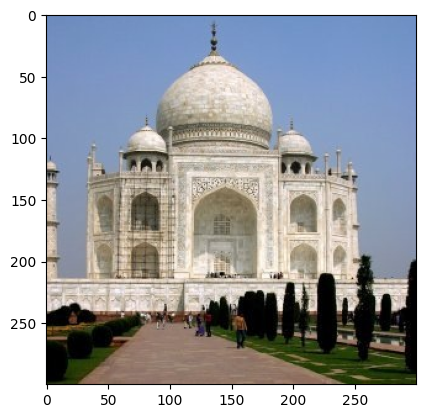

In [ ]:
plt.imshow(unsharp_img)

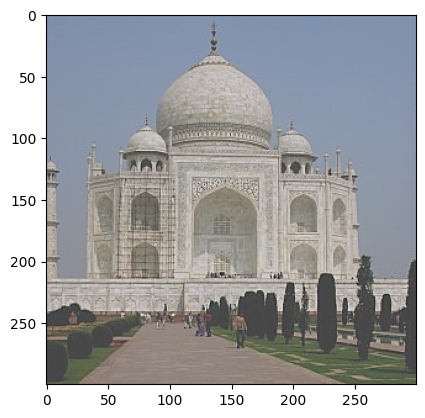

In [ ]:
plt.imshow(sharpened)

## Part 2.2: Hybrid Images

In [ ]:
lowfreq_im = Image.open('./bball_aligned.jpg').convert('L')
lowfreq_im = np.asarray(lowfreq_im)
lowfreq_im = lowfreq_im/255.
highfreq_im = Image.open('./coin_aligned.jpg').convert('L')
highfreq_im = np.asarray(highfreq_im)
highfreq_im = highfreq_im/255.

In [ ]:
lowpassed_im = lowpass(lowfreq_im, 1)
highpassed_im = highpass(highfreq_im, 2)
hybrid_im = lowpassed_im + highpassed_im

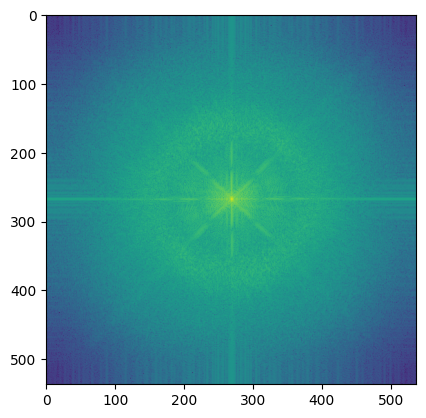

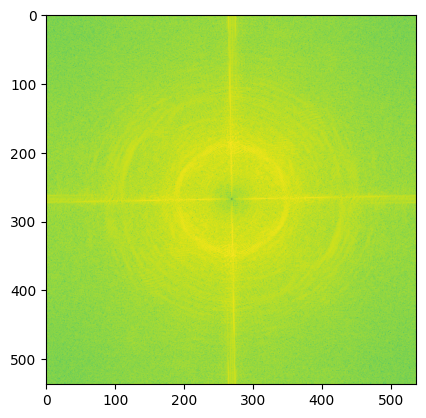

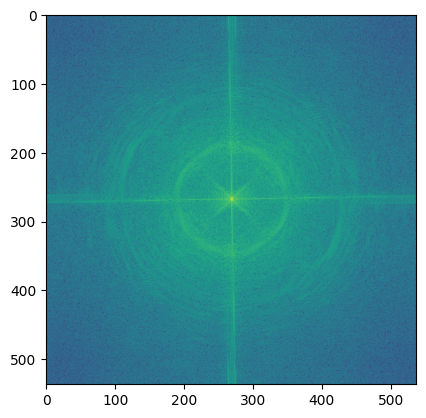

In [ ]:
save_fourier_transform(lowpassed_im, 'ball_lowpassed.png')
save_fourier_transform(highpassed_im, 'coin_highpassed.png')
save_fourier_transform(hybrid_im, 'hybrid_logfft.png')

In [ ]:
def save_fourier_transform(img, name):
  fft_mag = np.log(np.abs(np.fft.fftshift(np.fft.fft2(img))))
  plt.imshow(fft_mag)
  plt.imsave(name, fft_mag)
  plt.show()

In [ ]:
from scipy.ndimage import gaussian_filter

def lowpass(img, sigma):
    if img.ndim == 3:
        return np.stack([gaussian_filter(img[..., c], sigma=sigma) for c in range(img.shape[2])], axis=-1)
    return gaussian_filter(img, sigma=sigma)

def highpass(img, sigma):
    return img - lowpass(img, sigma)

In [ ]:
def hybrid_image(lowfreq_im, highfreq_im, sigma1, sigma2):
  low_pass = lowpass(lowfreq_im, sigma1)
  high_pass = highpass(highfreq_im, sigma2)
  return low_pass + high_pass

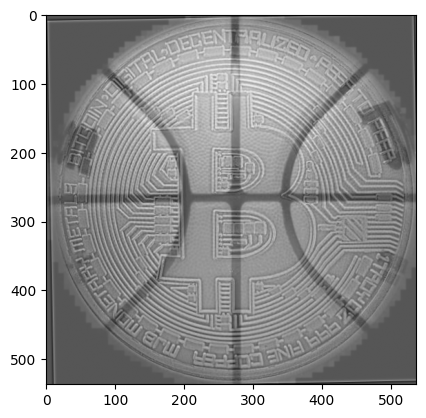

In [ ]:
## You will provide the code below. Sigma1 and sigma2 are arbitrary
## cutoff values for the high and low frequencies

sigma1 = [1]
sigma2 = [2]

for s1 in sigma1:
  for s2 in sigma2:
    hybrid = hybrid_image(lowfreq_im, highfreq_im, s1, s2)
    # top, bottom, left, right = 30, 230, 60, 400
    # hybrid = hybrid[top:bottom, left:right]

    plt.imshow(hybrid, cmap='gray')
    plt.imsave(f'ballcoin_s1_{s1}_s2_{s2}.png', hybrid, cmap='gray')
    plt.show()

## Compute and display Gaussian and Laplacian Pyramids
## You also need to supply this function
# N = 5 # suggested number of pyramid levels (your choice)
# pyramids(hybrid, N)

## Part 2.3: Gaussian and Laplacian Stacks

In [ ]:
apple = Image.open('./apple_aligned.jpg')
apple = np.asarray(apple)
apple = apple/255.
orange = Image.open('./orange_aligned.jpg')
orange = np.asarray(orange)
orange = orange/255.

h, w = apple.shape[0], apple.shape[1]

In [ ]:
def Gaussian_stack(img, levels, sigma):
  assert img.ndim == 3, "Image needs to be a color image."
  stack = np.zeros((levels, img.shape[0], img.shape[1], img.shape[2]))
  stack[0] = img
  for level in range(1, levels):
    lp = lowpass(img, sigma)
    stack[level] = lp
    img = lp
  return stack

In [ ]:
def Laplacian_stack(Gaussian_stack):
  levels = Gaussian_stack.shape[0]
  stack = np.zeros((levels, Gaussian_stack.shape[1], Gaussian_stack.shape[2], Gaussian_stack.shape[3]))
  for level in range(levels-1):
    stack[level] = Gaussian_stack[level] - Gaussian_stack[level+1]
  stack[levels-1] = Gaussian_stack[levels-1]
  return stack


In [ ]:
apple_gaussian = Gaussian_stack(apple, 5, 5)
orange_gaussian = Gaussian_stack(orange, 5, 5)
apple_laplacian = Laplacian_stack(apple_gaussian)
orange_laplacian = Laplacian_stack(orange_gaussian)

In [ ]:
binary_mask = np.zeros((apple.shape[0], apple.shape[1], 1))
binary_mask[:, int(w/2):w, :] = 1
masks = Gaussian_stack(binary_mask, 5, 40)

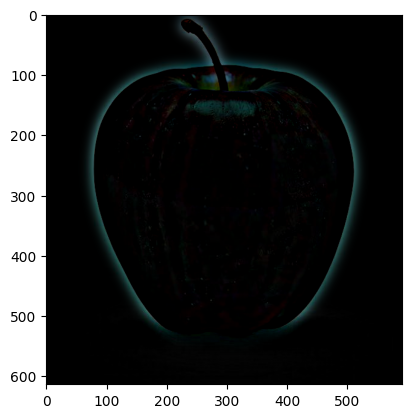

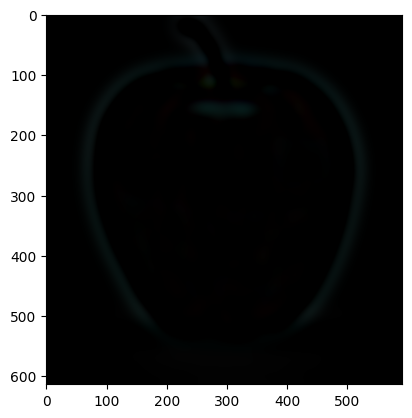

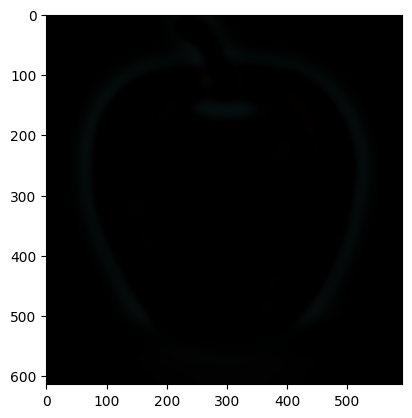

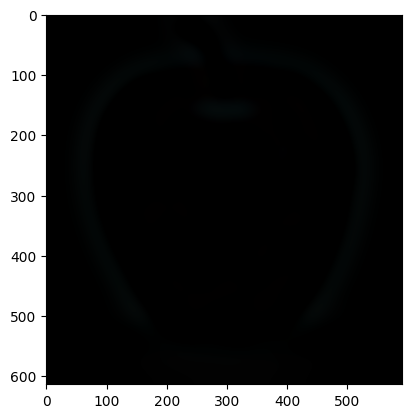

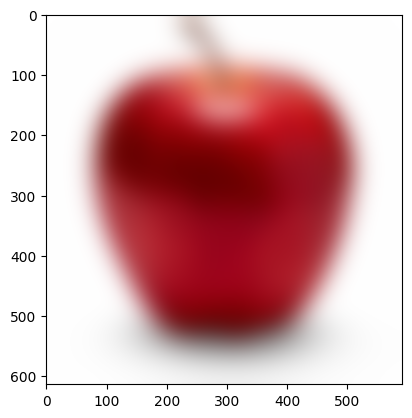

In [ ]:
for level in range(apple_gaussian.shape[0]):
  plt.imshow(apple_laplacian[level])
  plt.show()

In [242]:
def blend_image(lap_stack1, lap_stack2, masks):
  assert lap_stack1.shape == lap_stack2.shape, "All inputs need to have the same shape."
  result = np.zeros(lap_stack1.shape)
  for level in range(lap_stack1.shape[0]):
    result[level] = masks[level] * lap_stack1[level] + (1 - masks[level]) * lap_stack2[level]
  result = result.sum(axis=0)
  result = (result - result.min()) / (result.max() - result.min() + 1e-8)
  return result

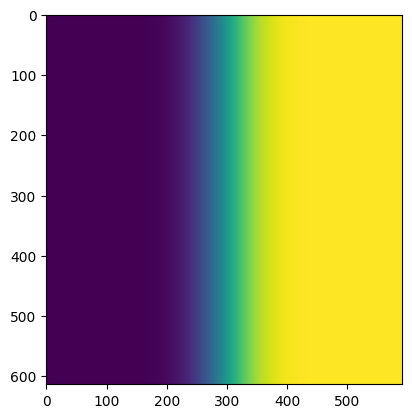

In [ ]:
plt.imshow(masks[4])

In [ ]:
blend = blend_image(apple_laplacian, orange_laplacian, masks)

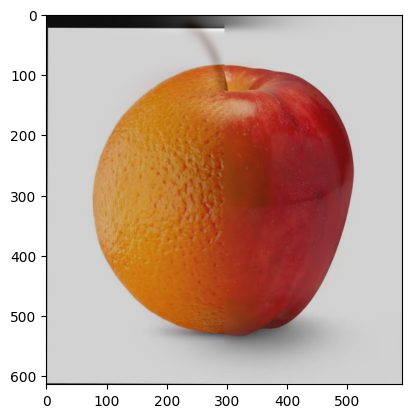

In [ ]:
plt.imshow(blend)

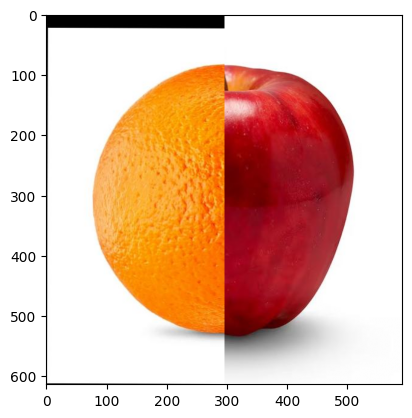

In [ ]:
plt.imshow(np.hstack([orange[:,:int(w/2)], apple[:,int(w/2):]]))
plt.imsave('orange_apple_side_by_side.png', np.hstack([orange[:,:int(w/2)], apple[:,int(w/2):]]))

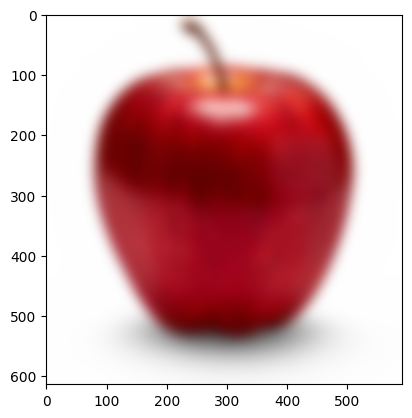

In [ ]:
plt.imshow(apple_laplacian[4])

In [ ]:
for level in [0 , 2, 4]:
  plt.imsave(f'apple_level_{level}.png', masks[level] * apple_laplacian[level])
  plt.imsave(f'orange_level_{level}.png', (1 - masks[level]) * orange_laplacian[level])
  plt.imsave(f'blend_level_{level}.png', blend[level])

In [ ]:
apple_reconstr = [masks[level] * apple_laplacian[level] for level in range(apple_laplacian.shape[0])]
orange_reconstr = [(1 - masks[level]) * orange_laplacian[level] for level in range(orange_laplacian.shape[0])]
apple_reconstr = sum(apple_reconstr)
apple_reconstr = (apple_reconstr - apple_reconstr.min()) / (apple_reconstr.max() - apple_reconstr.min() + 1e-8)
orange_reconstr = sum(orange_reconstr)
orange_reconstr = (orange_reconstr - orange_reconstr.min()) / (orange_reconstr.max() - orange_reconstr.min() + 1e-8)

plt.imsave(f'apple_reconstructed.png', apple_reconstr)
plt.imsave(f'orange_reconstructed.png', orange_reconstr)
plt.imsave(f'blend.png', blend)

# Part 2.4 - Another example (irregular mask)


In [129]:
hotdog = Image.open('./hotdog_aligned.jpg')
hotdog = np.asarray(hotdog)
hotdog = hotdog/255.
banana = Image.open('./banana_aligned.jpg')
banana = np.asarray(banana)
banana = banana/255.

h, w = hotdog.shape[0], hotdog.shape[1]

In [165]:
hotdog_gaussian = Gaussian_stack(hotdog, 5, 30)
banana_gaussian = Gaussian_stack(banana, 5, 30)
hotdog_laplacian = Laplacian_stack(hotdog_gaussian)
banana_laplacian = Laplacian_stack(banana_gaussian)

In [139]:
def zigzag_mask(shape, start=(350,100), end=(0,400), steps=10):
    """
    Disclaimer: Boilerplate code from Chat-GPT - ajdustments / fixes made by me.
    Create a binary mask with a zig-zag boundary between start and end.
    shape : (H, W) or (H, W, C)
    start, end : (x, y) coordinates
    steps : number of zigzag segments
    """
    H, W = shape[:2]
    mask = np.zeros((H, W), dtype=np.uint8)

    # Create zigzag points between start and end
    x0, y0 = start
    x1, y1 = end
    xs = np.linspace(x0, x1, steps)
    ys = np.linspace(y0, y1, steps)

    pts = np.array(list(zip(xs, ys)), dtype=np.int32)
    # add zigzag offsets
    # zigzag_x = []
    # zigzag_y = []
    # for i in range(steps):
    #     zigzag_x.append(int(xs[i] + (20 if i % 2 == 0 else -20)))  # zig-zag sideways
    #     zigzag_y.append(int(ys[i]))
    # pts = np.array(list(zip(zigzag_x, zigzag_y)), dtype=np.int32)


    # complete polygon (from line to bottom-right + bottom-left corners)
    poly = np.vstack([pts, [W, H], [W, 0]])

    # Fill the polygon white
    cv2.fillPoly(mask, [poly], 255)

    # If the input is color, expand the mask
    if len(shape) == 3:
        mask = mask[..., None]

    return mask.astype(np.float32) / 255.0

In [159]:
mask = zigzag_mask((h,w,3), (440,0), (110,h), 10)
masks = Gaussian_stack(mask, 5, 50)

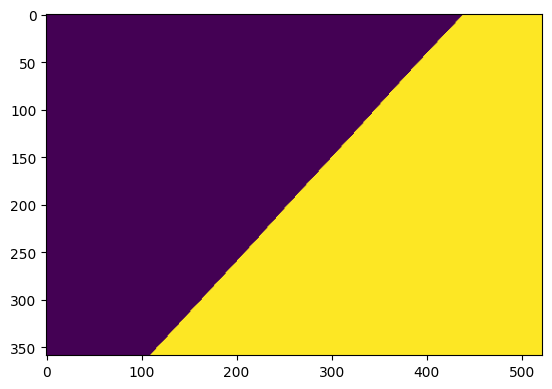

In [155]:
plt.imshow(mask)

In [166]:
blend = blend_image(banana_laplacian, hotdog_laplacian, masks)

In [168]:
norm = np.sum([banana*masks[0], hotdog*(1-masks[0])], axis=0)
plt.imsave('banana_hotdog_side_by_side.png', norm)
plt.imsave('blend_banana_hotdog.png', blend)

In [169]:
# Obama Brocolli

In [241]:
obama = Image.open('./obama.jpg')
obama = np.asarray(obama)
obama = obama/255.
brocolli = Image.open('./brocolli.jpg')
brocolli = np.asarray(brocolli)
brocolli = brocolli/255.
mask = Image.open('./obama_mask.jpg').convert('RGB')
mask = np.asarray(mask)
mask = mask/255.


h, w = obama.shape[0], obama.shape[1]

In [248]:
obama_gaussian = Gaussian_stack(obama, 5, 30)
brocolli_gaussian = Gaussian_stack(brocolli, 5, 30)
obama_laplacian = Laplacian_stack(obama_gaussian)
brocolli_laplacian = Laplacian_stack(brocolli_gaussian)
masks = Gaussian_stack(mask, 5, 30)

In [274]:
blend = blend_image(obama_laplacian, brocolli_laplacian, masks)

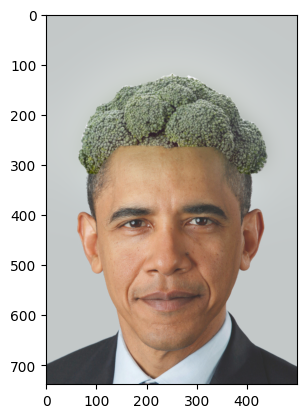

In [250]:
plt.imshow(blend)

In [219]:
norm = np.sum([obama*masks[0], brocolli*(1-masks[0])], axis=0)
plt.imsave('obrocolli_naive.png', norm)
plt.imsave('obrocolli_blend.png', blend)

In [268]:
def blend_image(lap_stack1, lap_stack2, masks):
  assert lap_stack1.shape == lap_stack2.shape, "All inputs need to have the same shape."
  result = np.zeros(lap_stack1.shape)
  for level in range(lap_stack1.shape[0]):
    result[level] = masks[level] * lap_stack1[level] + (1 - masks[level]) * lap_stack2[level]
  return result

In [276]:
for level in [0 , 2, 4]:
  bl = blend[level]
  bl = (bl - bl.min()) / (bl.max() - bl.min() + 1e-8)
  plt.imsave(f'obrocolli_level_{level}.png', bl)